## Lab Notebook - Rift Inversion Project ##
This Jupyter notebooks serves as a record of modeling runs done on Stampede2 as part of the rift inversion project. Each cell includes a note of the current modeling goal and the code to generate the resulting models, as well as a report on the model results.

__NOTE__: Never run all cells, model inputs are designed to be temporary

In [1]:
import ripropagate

# Key function: generate
# Parameters in generate: lthick,evel,etime,output,ver,soft,shell,file

## 4/19/2022 ##
* Setting three tests on rifting phase to see how it affects strain rate "explosions."
1. Reduce timestep to 10k years (a)
2. Reduce timestep to 5k years (b)
3. Change nonlinear solver tolerance to 1e-5 (c)

(array([[      0.,       0.,       0., ...,       0.,       0.,       0.],
        [   2000.,    2000.,    2000., ...,    2000.,    2000.,    2000.],
        [   4000.,    4000.,    4000., ...,    4000.,    4000.,    4000.],
        ...,
        [ 996000.,  996000.,  996000., ...,  996000.,  996000.,  996000.],
        [ 998000.,  998000.,  998000., ...,  998000.,  998000.,  998000.],
        [1000000., 1000000., 1000000., ..., 1000000., 1000000., 1000000.]]),
 array([[     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        ...,
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0.

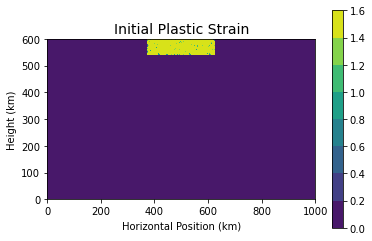

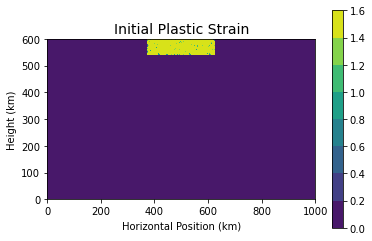

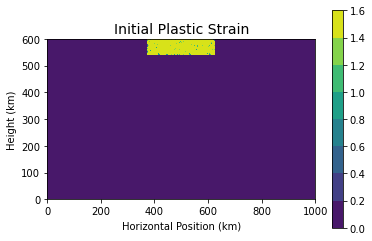

In [2]:
ripropagate.generate(etime=12.5,evel=1,output='./041922_ri_a',file='ri_base_10k.prm',soft=0.375,depth=600,p1=400,p2=200,
                     shell='run_base_nal.sh',ver='a',nodes=2)
ripropagate.comp_ascii(depth=600,output='./041922_ri_a')

ripropagate.generate(etime=12.5,evel=1,output='./041922_ri_b',file='ri_base_5k.prm',soft=0.375,depth=600,p1=400,p2=200,
                     shell='run_base_nal.sh',ver='b',nodes=2)
ripropagate.comp_ascii(depth=600,output='./041922_ri_b')

ripropagate.generate(etime=12.5,evel=1,output='./041922_ri_c',file='ri_base_tol.prm',soft=0.375,depth=600,p1=400,p2=200,
                     shell='run_base_nal.sh',ver='c',nodes=2)
ripropagate.comp_ascii(depth=600,output='./041922_ri_c')

## 5/3/2022 ##
* Working on testing use of the damper and limiter. Currently have rifted versions of models with damper only (a) and damper with limiter (b). Need to correctly invert these.

In [3]:
ripropagate.generate(etime=32.5,evel=-1,output='./050322_ri_a',file='ri_base_damp.prm',soft=0.375,depth=600,p1=400,p2=200,
                     shell='run_base_nal.sh',ver='a',nodes=3)
ripropagate.generate(etime=32.5,evel=-1,output='./050322_ri_b',file='ri_base_damplim.prm',soft=0.375,depth=600,p1=400,p2=200,
                     shell='run_base_nal.sh',ver='b',nodes=3)

* Also going to run some rifting tests with the damper at higher resolutions.

(array([[      0.,       0.,       0., ...,       0.,       0.,       0.],
        [   2000.,    2000.,    2000., ...,    2000.,    2000.,    2000.],
        [   4000.,    4000.,    4000., ...,    4000.,    4000.,    4000.],
        ...,
        [ 996000.,  996000.,  996000., ...,  996000.,  996000.,  996000.],
        [ 998000.,  998000.,  998000., ...,  998000.,  998000.,  998000.],
        [1000000., 1000000., 1000000., ..., 1000000., 1000000., 1000000.]]),
 array([[     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        ...,
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0.

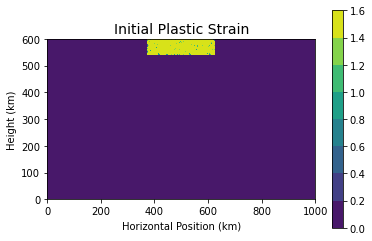

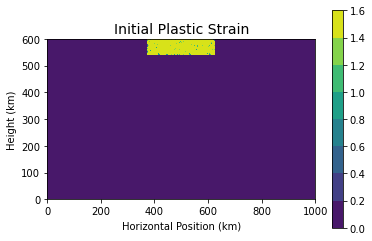

In [5]:
ripropagate.generate(etime=5,evel=1,output='./050322_ri_c',file='ri_base_damp2x.prm',soft=0.375,depth=600,p1=400,p2=200,
                     shell='run_base_nal.sh',ver='c',nodes=3)
ripropagate.comp_ascii(depth=600,output='./050322_ri_c')
ripropagate.generate(etime=5,evel=1,output='./050322_ri_d',file='ri_base_damp4x.prm',soft=0.375,depth=600,p1=400,p2=200,
                     shell='run_base_nal.sh',ver='d',nodes=3)
ripropagate.comp_ascii(depth=600,output='./050322_ri_d')

## 5/20/2022 ## 
* Ready to start production models using Cowgill allocation.
* Starting with same reference model as before to ensure consistency, but also running end-member rift structures.
* Using same random seed for reference model but trying different seed for other 2 to try to localize closer to center.

(array([[      0.,       0.,       0., ...,       0.,       0.,       0.],
        [   2000.,    2000.,    2000., ...,    2000.,    2000.,    2000.],
        [   4000.,    4000.,    4000., ...,    4000.,    4000.,    4000.],
        ...,
        [ 996000.,  996000.,  996000., ...,  996000.,  996000.,  996000.],
        [ 998000.,  998000.,  998000., ...,  998000.,  998000.,  998000.],
        [1000000., 1000000., 1000000., ..., 1000000., 1000000., 1000000.]]),
 array([[     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        ...,
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0.

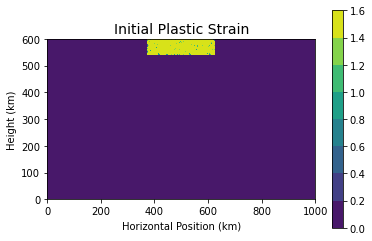

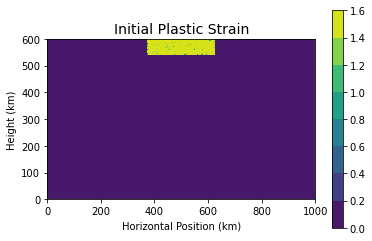

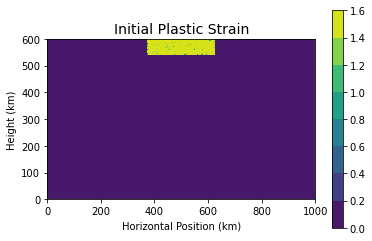

In [2]:
# Reference Model
ripropagate.generate(etime=12.5,evel=1,output='./052022_rip_a',file='ri_base.prm',soft=0.375,depth=600,p1=400,p2=200,
                     shell='run_base.sh',ver='a',nodes=3)
ripropagate.comp_ascii(depth=600,output='./052022_rip_a',seed=25,non_initial=True)

# Hot and fast
ripropagate.generate(etime=20,evel=1.5,lthick=60,output='./052022_rip_b',file='ri_base_lowoutput.prm',soft=0.375,depth=600,p1=400,p2=200, shell='run_base.sh',ver='b',nodes=3)
ripropagate.comp_ascii(depth=600,output='./052022_rip_b',seed=20,non_initial=True,thicknesses=[20,20,20])

# Slow and cold
ripropagate.generate(etime=30,evel=0.5,lthick=120,output='./052022_rip_c',file='ri_base_lowoutput.prm',soft=0.375,depth=600,p1=400,p2=200, shell='run_base.sh',ver='c',nodes=3)
ripropagate.comp_ascii(depth=600,output='./052022_rip_c',seed=20,non_initial=True,thicknesses=[20,20,80])

## 5/22/2022 ##
* Reference model (052022 a) finished rifting. Starting inversion

In [2]:
ripropagate.generate(etime=32.5,evel=-1,output='./052222_rip_a',file='ri_base.prm',soft=0.375,depth=600,p1=400,p2=200,
                     shell='run_base.sh',ver='a',nodes=3)

## 5/26/2022 ##

Model with 60 km lithosphere ate 1.5 cm/yr is failing - strain is not localizing in the center. Going to try 2 cm at 80 km instead.

(array([[      0.,       0.,       0., ...,       0.,       0.,       0.],
        [   2000.,    2000.,    2000., ...,    2000.,    2000.,    2000.],
        [   4000.,    4000.,    4000., ...,    4000.,    4000.,    4000.],
        ...,
        [ 996000.,  996000.,  996000., ...,  996000.,  996000.,  996000.],
        [ 998000.,  998000.,  998000., ...,  998000.,  998000.,  998000.],
        [1000000., 1000000., 1000000., ..., 1000000., 1000000., 1000000.]]),
 array([[     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        ...,
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0.

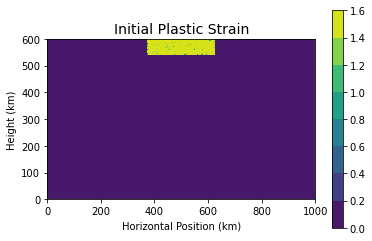

In [2]:
ripropagate.generate(etime=20,evel=2,lthick=80,output='./052622_rip_b',file='ri_base_lowoutput.prm',soft=0.375,depth=600,p1=400,p2=200, shell='run_base.sh',ver='b',nodes=3)
ripropagate.comp_ascii(depth=600,output='./052622_rip_b',seed=20,non_initial=True,thicknesses=[20,20,40])

## 6/5/2022 ##
* Still got weird rotation, so also trying 2 cm at 100 km

(array([[      0.,       0.,       0., ...,       0.,       0.,       0.],
        [   2000.,    2000.,    2000., ...,    2000.,    2000.,    2000.],
        [   4000.,    4000.,    4000., ...,    4000.,    4000.,    4000.],
        ...,
        [ 996000.,  996000.,  996000., ...,  996000.,  996000.,  996000.],
        [ 998000.,  998000.,  998000., ...,  998000.,  998000.,  998000.],
        [1000000., 1000000., 1000000., ..., 1000000., 1000000., 1000000.]]),
 array([[     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        ...,
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0.

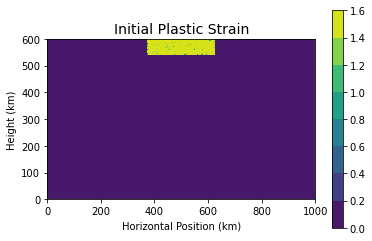

In [2]:
ripropagate.generate(etime=20,evel=2,lthick=100,output='./060522_rip',file='ri_base_lowoutput.prm',soft=0.375,depth=600,p1=400,p2=200, shell='run_base.sh',ver='a',nodes=3)
ripropagate.comp_ascii(depth=600,output='./060522_rip',seed=20,non_initial=True,thicknesses=[20,20,60])

## 6/17/2022 ##
* Discovered timestepping was the culprit. Rewrote 80 km model to have 10,000 year timestep, with AMR transitions at 150 km and 250 km (temp based)

(array([[      0.,       0.,       0., ...,       0.,       0.,       0.],
        [   2000.,    2000.,    2000., ...,    2000.,    2000.,    2000.],
        [   4000.,    4000.,    4000., ...,    4000.,    4000.,    4000.],
        ...,
        [ 996000.,  996000.,  996000., ...,  996000.,  996000.,  996000.],
        [ 998000.,  998000.,  998000., ...,  998000.,  998000.,  998000.],
        [1000000., 1000000., 1000000., ..., 1000000., 1000000., 1000000.]]),
 array([[     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        ...,
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0.

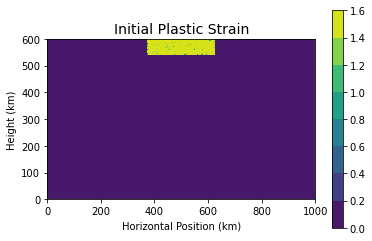

In [4]:
ripropagate.generate(etime=20,evel=2,lthick=80,output='./061722_rip',file='ri_base_lowoutput_lowtstep.prm',soft=0.375,depth=600,p1=400,p2=200, shell='run_base.sh',ver='a',nodes=3)
ripropagate.comp_ascii(depth=600,output='./061722_rip',seed=20,non_initial=True,thicknesses=[20,20,60])

## 6/21/2022 ##
* 60 km model (0619, entry got deleted) not converging, and 80 km model still not very asymmetric. Trying 120 km at 2 cm/yr to see if that promotes more asymmetry.

(array([[      0.,       0.,       0., ...,       0.,       0.,       0.],
        [   2000.,    2000.,    2000., ...,    2000.,    2000.,    2000.],
        [   4000.,    4000.,    4000., ...,    4000.,    4000.,    4000.],
        ...,
        [ 996000.,  996000.,  996000., ...,  996000.,  996000.,  996000.],
        [ 998000.,  998000.,  998000., ...,  998000.,  998000.,  998000.],
        [1000000., 1000000., 1000000., ..., 1000000., 1000000., 1000000.]]),
 array([[     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        ...,
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0.

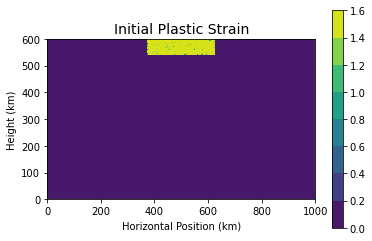

In [2]:
ripropagate.generate(etime=20,evel=2,lthick=120,output='./062122_rip_a',file='ri_base_lowoutput_lowtstep.prm',soft=0.375,depth=600,p1=400,p2=200, shell='run_base.sh',ver='a',nodes=3)
ripropagate.comp_ascii(depth=600,output='./062122_rip_a',seed=20,non_initial=True,thicknesses=[20,20,80])

Also trying model with thinner curst (30 km - 15 km upper, 15 km lower) to see if that helps

(array([[      0.,       0.,       0., ...,       0.,       0.,       0.],
        [   2000.,    2000.,    2000., ...,    2000.,    2000.,    2000.],
        [   4000.,    4000.,    4000., ...,    4000.,    4000.,    4000.],
        ...,
        [ 996000.,  996000.,  996000., ...,  996000.,  996000.,  996000.],
        [ 998000.,  998000.,  998000., ...,  998000.,  998000.,  998000.],
        [1000000., 1000000., 1000000., ..., 1000000., 1000000., 1000000.]]),
 array([[     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        ...,
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0.

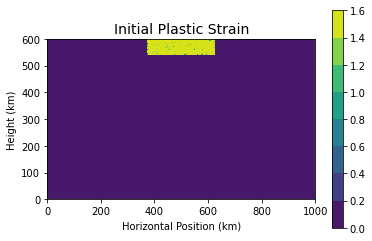

In [3]:
ripropagate.generate(etime=20,evel=2,lthick=80,output='./062122_rip_b',file='ri_base_lowoutput_lowtstep_thincrust.prm',soft=0.375,depth=600,p1=400,p2=200, shell='run_base.sh',ver='b',nodes=3)
ripropagate.comp_ascii(depth=600,output='./062122_rip_b',seed=20,non_initial=True,thicknesses=[15,15,50])